#  Logistic Regression Using Gradient Descent 

### Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

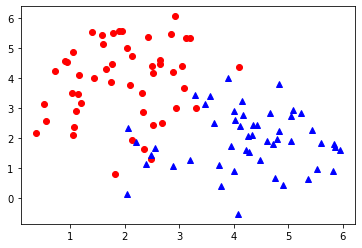

In [3]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')
plt.show()

In [4]:
class logistic_regression():
    
    # Function to initialise the model
    def __init__(self, learning_rate, tolerance, max_iterations):
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        
    # Function to fit and prepare model for given training data
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.costs, self.weights = self.gradient_descent()
        
    # Utility function to calculate sigmoid value
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))    
    
    # Utility function to calculate error for logistic regression
    def objective(self, n, y, y_pred):
        cost = -(1/n)*np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
        return cost

    # Utility function to calculate Jacobian for the loss function
    def jacobian(self, X, y, weights, sigmoid_val):
        j = (1/X.shape[0])*np.dot(sigmoid_val-y, X)
        return j
    
    # Function to optimise the weights of the model
    def gradient_descent(self):
        X_train = self.X
        X_train = np.hstack((X,np.ones((X_train.shape[0],1))))
        weights = np.zeros(X_train.shape[1])
        old_weights = np.array(weights)
        costs = []

        for _ in range(self.max_iterations):
            val = weights @ X_train.T
            sigmoid_val = self.sigmoid(val)
            weights = weights - self.learning_rate * self.jacobian(X_train, y, weights, sigmoid_val)
            costs.append(self.objective(X_train.shape[0], y, sigmoid_val))
            error = np.sqrt(np.sum(np.square(weights-old_weights))) / weights.shape[0]

            if error < self.tolerance:
                print('\nConverged at iteration: '+str(_))
                print('Weights obtained are: ', weights)
                break

            if _%500000==0:
                m1 = 'ITERATION: ' + str(_)
                m2 = 'COST: ' + str(costs[-1])
                print(m1, ' '*(20-len(m1)), m2)

            old_weights = np.copy(weights)

        return costs, weights
    
    # Function to calculate accuracy for final parameters
    def accuracy(self):
        X_train = self.X
        X_train = np.hstack((X_train,np.ones((X_train.shape[0],1))))
        Z = self.weights @ X_train.T
        y_pred = self.sigmoid(Z)
        y_pred = y_pred > 0.5
        y_pred = np.array(y_pred, dtype = 'int64')
        ans = (1 - np.sum(np.absolute(y_pred - self.y))/self.y.shape[0])*100
        print('\nTraining accuracy: ', round(ans, 2), "%\n")

    # Function to plot cost vs iteration graph
    def training_error(self):
        plt.plot(self.costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost vs Iterations')
        plt.show()
    
    # Function to plot data points and decision boundary
    def model_plot(self):
        x_scatter = np.linspace(0, 6, num=10)
        y_scatter = (x_scatter*self.weights[0]+self.weights[2])/-self.weights[1]
        plt.plot(self.X[:,0][y==0],self.X[:,1][y==0],'o',color='red')
        plt.plot(self.X[:,0][y==1],self.X[:,1][y==1],'^',color='blue')
        plt.plot(x_scatter, y_scatter)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Decision Boundary')
        plt.show()
        
    # Function to get statistics of the model
    def statistics(self):
        self.accuracy()
        self.training_error()
        self.model_plot()

ITERATION: 0          COST: 0.6931471805599453
ITERATION: 500000     COST: 0.14312182921730102
ITERATION: 1000000    COST: 0.14100992291438208
ITERATION: 1500000    COST: 0.1407322713746444

Converged at iteration: 1715149
Weights obtained are:  [ 3.46510037 -2.06406772 -4.71147969]

Training accuracy:  93.0 %



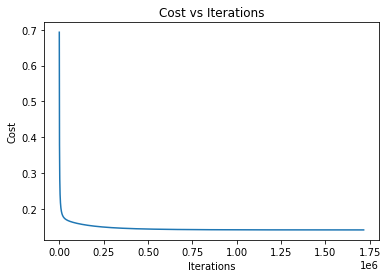

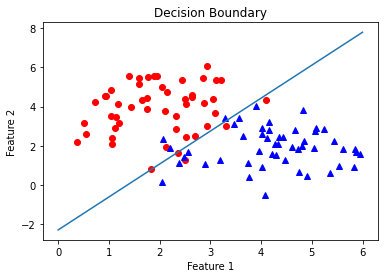

In [5]:
model = logistic_regression(learning_rate = 1e-3, tolerance = 1e-7, max_iterations = 10000000)
model.fit(X, y)
model.statistics()